In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import tweepy as tp
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['min','tokopediacare']
data = stop_factory + more_stopword
dictionary = ArrayDictionary(data)
stopword = StopWordRemover(dictionary)

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,id,fulltext,label
0,0,@tokopedia @TokopediaCare @anteraja_id \n10000...,negatif
1,1,Mau bayar BPJS kok gini mulu?\n@tokopedia @To...,negatif
2,2,@TokopediaCare belum ada...cek dm sudah saya k...,negatif
3,3,"@TokopediaCare astaghfirullah min, cek dm masy...",negatif
4,4,@pintutoko @TokopediaCare Aku juga gtu kak pad...,negatif
5,5,@TokopediaCare cek dm ya kak uang saya tertaha...,negatif
6,6,"@TokopediaCare siang min, saya mau top up ovo ...",negatif
7,7,@TokopediaCare dr kmrn saya udah dm dan jg pus...,negatif
8,8,RT @TokopediaCare: Siapa yang weekendnya masih...,netral
9,9,@TokopediaCare bgmn mengenai program super ele...,netral


In [7]:
label=df.set_index(["fulltext", "label"]).count(level="label")
label.head()

,id
label,
negatif,694
netral,284
positif,210


<AxesSubplot:title={'center':'Dataset'}, xlabel='Sentimen', ylabel='Jumlah tweet'>

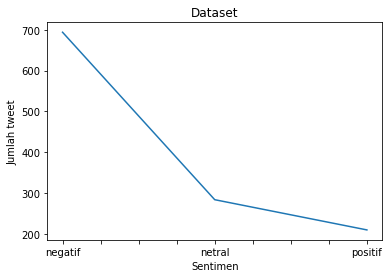

In [8]:
label['id'].plot.line(title='Dataset', xlabel='Sentimen', ylabel='Jumlah tweet')

In [9]:
df2 =  df[['fulltext']]
df2.head()

,fulltext
0,@tokopedia @TokopediaCare @anteraja_id \n10000...
1,Mau bayar BPJS kok gini mulu?\n@tokopedia @To...
2,@TokopediaCare belum ada...cek dm sudah saya k...
3,"@TokopediaCare astaghfirullah min, cek dm masy..."
4,@pintutoko @TokopediaCare Aku juga gtu kak pad...


In [10]:
df2['fulltext'] = df2.iloc[:,0].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.head(10)

,fulltext
0,@tokopedia @tokopediacare @anteraja_id 1000097...
1,mau bayar bpjs kok gini mulu? @tokopedia @toko...
2,@tokopediacare belum ada...cek dm sudah saya k...
3,"@tokopediacare astaghfirullah min, cek dm masy..."
4,@pintutoko @tokopediacare aku juga gtu kak pad...
5,@tokopediacare cek dm ya kak uang saya tertaha...
6,"@tokopediacare siang min, saya mau top up ovo ..."
7,@tokopediacare dr kmrn saya udah dm dan jg pus...
8,rt @tokopediacare: siapa yang weekendnya masih...
9,@tokopediacare bgmn mengenai program super ele...


In [11]:
df2['fulltext'] = df2['fulltext'].str.replace('((www\.[^\s]+)|(https?://[^\s]+))','')
df2['fulltext'] = df2['fulltext'].str.replace('@[^\s]+','')
df2['fulltext'] = df2['fulltext'].str.replace('inv[^\s]+','')
df2['fulltext'] = df2['fulltext'].str.replace('[0-9]+','')
df2['fulltext'] = df2['fulltext'].str.replace('tokopediacare+','')
df2['fulltext'] = df2['fulltext'].str.replace('[^\w\s]','')
df2.head(10)

,fulltext
0,hari masih nunggu kurir pick up pesanan s...
1,mau bayar bpjs kok gini mulu
2,belum adacek dm sudah saya kirim nya
3,astaghfirullah min cek dm masya allah dari ta...
4,aku juga gtu kak padahal saldo pelatihannya ...
5,cek dm ya kak uang saya tertahan jt tidak bi...
6,siang min saya mau top up ovo cash jt kok gab...
7,dr kmrn saya udah dm dan jg pusat bantuan tok...
8,rt siapa yang weekendnya masih balesbalesan c...
9,bgmn mengenai program super electrilife koq g...


In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df2['fulltext'] = df2['fulltext'][:].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df2.head(10)

,fulltext
0,hari masih nunggu kurir pick up pesan sudah ti...
1,mau bayar bpjs kok gin mulu
2,belum adacek dm sudah saya kirim nya
3,astaghfirullah min cek dm masya allah dari tad...
4,aku juga gtu kak padahal saldo latih sudah kur...
5,cek dm ya kak uang saya tahan jt tidak bisa di...
6,siang min saya mau top up ovo cash jt kok gabi...
7,dr kmrn saya udah dm dan jg pusat bantu tokope...
8,rt siapa yang weekendnya masih balesbalesan ch...
9,bgmn kena program super electrilife koq ga ada...


In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['min','tokopediacare', 'tokopedia', 'hai', 'halo', 'sih', 'nih', 'yg', 'kak', 'ni', 'jd', 'walopun','tuh']

stopword = stop_factory + more_stopword

In [22]:
tweet_set = open("dataset preprocessing + stemming.csv", "w", encoding="utf-8")
writer = csv.writer(tweet_set)

writer.writerow(['id','fulltext','label'])

for i, fulltext in enumerate (df2['fulltext'] +','+ df['label']):
    writer.writerow((i,fulltext))

In [18]:
tweet_set = open("dataset preprocessing.csv", "w", encoding="utf-8")
writer = csv.writer(tweet_set)

writer.writerow(['id','fulltext','label'])

for i, fulltext in enumerate (df2['fulltext'] +','+ df['label']):
    writer.writerow((i,fulltext))

In [15]:
wordc = "".join(df2.fulltext.values)

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(['dm','sih','dong','tolong','tokped','kak','yatokopediacare','tokopedia','tokopediacare','kalo','min','nya','aja','yg','atau', 'ada', 'adalah', 'adanya', 'agar', 'akan', 'aku', 'anda', 'antara', 'apa', 'apabila', 'apakah', 'apalagi', 'atas', 'adapun', 'agaknya', 'akan', 'akankah', 'akhirnya', 'akulah', 'amat', 'amatlah', 'andalah', 'antar', 'antaranya', 'ataukah', 'ataupun', 'bagaimana', 'bagi', 'bahkan', 'bahwa', 'baik', 'banyak', 'baru', 'beberapa', 'belum', 'berapa', 'berbagai', 'bersama', 'bila', 'bisa', 'bagai', 'bagaikan', 'bagaimanakah', 'bagaimanapun', 'bahwasanya', 'beginikah', 'beginilah', 'begitu', 'begini', 'begitukah', 'begitulah', 'begitupun', 'belumlah', 'berapakah', 'berapalah', 'berapapun', 'bermacam', 'betulkah', 'biasa', 'biasanya', 'bilakah', 'bisakah', 'bolehlah', 'bolehkah', 'buat', 'bukannya', 'bukankah', 'bukanlah', 'contohnya', 'cukup', 'cuma', 'dan', 'dapat', 'dari', 'daripada', 'demikian', 'demikianlah', 'dengan', 'di', 'dia', 'dilakukan', 'dalam', 'dahulu', 'dekat', 'demi', 'depan', 'dialah', 'diantaranya', 'diantara', 'dikarenakan', 'dini', 'diri', 'dirinya', 'dulu', 'entah', 'entahlah', 'hal', 'hanya', 'harus', 'hingga', 'hanyalah', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'ia', 'ini', 'itu', 'ialah', 'itulah', 'ibarat', 'ingin', 'inginkah', 'inginkan', 'inikah', 'inilah', 'itukah', 'jadi', 'juga', 'jika', 'jikalau', 'jangan', 'janganlah', 'jangankan', 'justru', 'kalau', 'kita', 'kali', 'kami', 'kamu', 'kapan', 'karena', 'kata', 'katanya', 'kau', 'ke', 'kembali', 'kemudian', 'kepada', 'ketika', 'kini', 'kala', 'kalaulah', 'kalaupun', 'kalian', 'kamilah', 'kamulah', 'kapankah', 'kapanpun', 'karenanya', 'kecil', 'kenapa', 'kepadanya', 'khususnya', 'kinilah', 'kiranya', 'kitalah', 'kok', 'lagi', 'lama', 'lain', 'lainnya', 'lalu', 'langsung', 'lebih', 'luar', 'lainnya', 'lamanya', 'maka', 'malah', 'mana', 'masih', 'maupun', 'melalui', 'memang', 'mengapa', 'mengatakan', 'mengenai', 'menjadi', 'menurut', 'menyatakan', 'mereka', 'merupakan', 'meski', 'meskipun', 'misalnya', 'mulai', 'macam', 'makanya', 'makin', 'malahan', 'mampu', 'mampukah', 'manakala', 'manalagi', 'masihkah', 'masing', 'mau', 'melainkan', 'merekalah', 'mungkin', 'mungkinlah', 'namun', 'nah', 'nanti', 'nantinya', 'nyaris', 'oleh', 'olehnya', 'pada', 'padahal', 'paling', 'papar', 'paparnya', 'para', 'per', 'perlu', 'pernah', 'pula', 'pun', 'padanya', 'pantas', 'pasti', 'pastilah', 'percuma', 'rupanya', 'saat', 'saja', 'salah', 'saling', 'sama', 'sampai', 'sangat', 'saya', 'seandainya', 'sebab', 'sebagai', 'sebelum', 'sebuah', 'secara', 'sedang', 'sedangkan', 'sehingga', 'sejak', 'sejumlah', 'sekarang', 'sekitar', 'selain', 'selama', 'sementara', 'semua', 'sendiri', 'seorang', 'seperti', 'serta', 'seseorang', 'sesuatu', 'setelah', 'setiap', 'suatu', 'sudah', 'saatnya', 'sajalah', 'sambil', 'sana', 'sangatlah', 'sayalah', 'sebabnya', 'sebagaimana', 'sebagainya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebetulnya', 'sebisanya', 'sedemikian', 'sedikit', 'sedikitnya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sejenak', 'sekali', 'sekalian', 'sekaligus', 'sekalipun', 'seketika', 'sekiranya', 'sekitarnya', 'sela', 'selagi', 'selaku', 'selalu', 'selamanya', 'seluruhnya', 'semacam', 'semakin', 'semasih', 'semaunya', 'sempat', 'semuanya', 'semula', 'sendirinya', 'seolah', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'sepertinya', 'sering', 'seringnya', 'serupa', 'sesaat', 'sesama', 'sesegera', 'sesekali', 'seseorang', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'seterusnya', 'setidaknya', 'sewaktu', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'sudahkah', 'sudahlah', 'supaya', 'tak', 'tidak', 'tandas', 'tandasnya', 'tanpa', 'tapi', 'telah', 'tempat', 'tentang', 'terhadap', 'terjadi', 'termasuk', 'ternyata', 'tersebut', 'terus', 'tetap', 'tetapi', 'tadi', 'tadinya', 'tentu', 'tentulah', 'tentunya', 'terdiri', 'terhadapnya', 'terlalu', 'terlebih', 'tersebutlah', 'tertentu', 'tiap', 'tidakkah', 'tidaklah', 'ujar', 'ujarnya', 'untuk', 'walaupun', 'yaitu', 'yakni', 'yang', 'ya', 'waduh', 'wah', 'wahai', 'walau', 'wakil', 'waktu', 'waktunya', 'wanita', 'warga', 'warta', 'wib', 'wilayah', 'rt'])
def create_word_cloud(string):
    cloud = WordCloud(width = 5000, height = 5000,background_color = "white", max_words = 500, stopwords=stopwords).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    cloud.to_file("preprocessing.png")

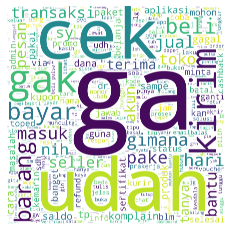

In [17]:
create_word_cloud(wordc)